# Credit EDA Assignment                           - By Varun Sharma

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read in DataSet

inp0 = pd.read_csv("application_data.csv")
inp1 = pd.read_csv("previous_application.csv")
inp0.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Extracting information from the dataset inp0 & inp1
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [6]:
inp0.shape

(307511, 122)

In [7]:
inp1.shape

(1670214, 37)

In [8]:
inp1.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [9]:
inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
inp1.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [11]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 250)

### Data Cleaning

#### Missing Values

In [12]:
inp0.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [13]:
inp0.isnull().sum()/len(inp0)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [14]:
# As per above analysis Columns With less than or equal to  32%, 13%  having null Values.

null_count= inp0.isnull().sum()
l1=len(inp0)
null_count= null_count[null_count.values>(0.32*l1)]
null_count


OWN_CAR_AGE                     202929
EXT_SOURCE_1                    173378
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE                 214865
ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE                  153020
FLOORSMIN_MODE                  208642
LANDAREA_MODE            

In [15]:
len(null_count)  #  Number of Null Columns 

49

In [16]:
inp0.isna().mean().round(6) * 100      # % null values columns in Dataset

SK_ID_CURR                       0.0000
TARGET                           0.0000
NAME_CONTRACT_TYPE               0.0000
CODE_GENDER                      0.0000
FLAG_OWN_CAR                     0.0000
FLAG_OWN_REALTY                  0.0000
CNT_CHILDREN                     0.0000
AMT_INCOME_TOTAL                 0.0000
AMT_CREDIT                       0.0000
AMT_ANNUITY                      0.0039
AMT_GOODS_PRICE                  0.0904
NAME_TYPE_SUITE                  0.4201
NAME_INCOME_TYPE                 0.0000
NAME_EDUCATION_TYPE              0.0000
NAME_FAMILY_STATUS               0.0000
NAME_HOUSING_TYPE                0.0000
REGION_POPULATION_RELATIVE       0.0000
DAYS_BIRTH                       0.0000
DAYS_EMPLOYED                    0.0000
DAYS_REGISTRATION                0.0000
DAYS_ID_PUBLISH                  0.0000
OWN_CAR_AGE                     65.9908
FLAG_MOBIL                       0.0000
FLAG_EMP_PHONE                   0.0000
FLAG_WORK_PHONE                  0.0000


In [17]:
# Columns Having null values less than 32%
inp0.drop(inp0.columns[inp0.apply(lambda x: x.isnull().sum() > (0.32*l1))], axis=1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0

In [18]:
null = inp0.isnull().sum()/len(inp0)*100     # Null values %age 
null.sort_values(ascending = False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

### Imputing Values

##### Handling 'OCCUPATION_TYPE'

In [19]:
inp0.OCCUPATION_TYPE.value_counts(normalize= True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [20]:
inp0[inp0['OCCUPATION_TYPE'].isnull()]['NAME_INCOME_TYPE'].value_counts()   # income type where occupation has null values

Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

- Imputing using mode()

In [21]:
inp0.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

## Univariate Analysis

### Imputing EXT_SOURCE_1 Columns

In [22]:
inp0['EXT_SOURCE_1'].describe()

count    134133.000000
mean          0.502130
std           0.211062
min           0.014568
25%           0.334007
50%           0.505998
75%           0.675053
max           0.962693
Name: EXT_SOURCE_1, dtype: float64

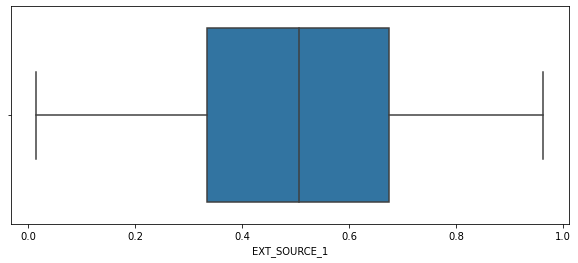

In [23]:
plt.figure(figsize=[10,4])
sns.boxplot(inp0.EXT_SOURCE_1)
plt.show()

In [24]:
inp0['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

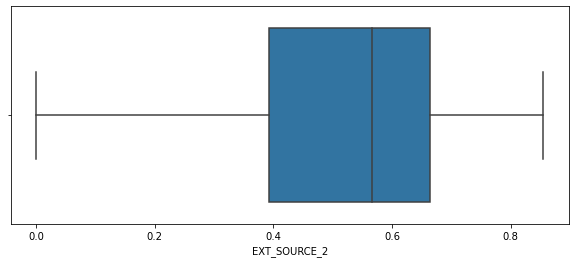

In [25]:
plt.figure(figsize=[10,4])
sns.boxplot(inp0.EXT_SOURCE_2)
plt.show()

In [26]:
inp0['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

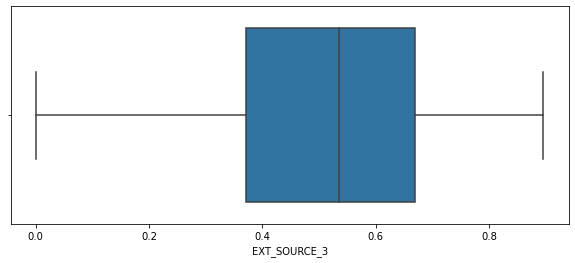

In [27]:
plt.figure(figsize=[10,4])
sns.boxplot(inp0.EXT_SOURCE_3)
plt.show()

- Dropping 'EXT_SOURCE_1' & 'EXT_SOURCE_3' as they have high NAN(Null) values

In [28]:
inp0.drop(columns=['EXT_SOURCE_3','EXT_SOURCE_1'], inplace = True)
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.

In [29]:
inp0['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

- EXT_SOURCE_2 has no outliers, I can be imputed using mean of the column

In [30]:
inp0.EXT_SOURCE_2.mean()

0.5143926741308463

###  AMT_INCOME_TOTAL

In [31]:
inp0.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [32]:
inp0.AMT_INCOME_TOTAL.value_counts()

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

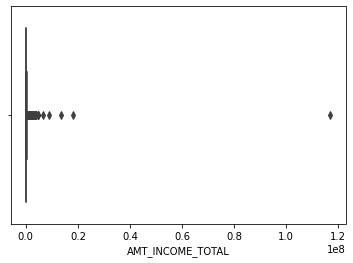

147150.0

In [33]:
#Outlier in AMT_INCOME_TOTAL

sns.boxplot(inp0['AMT_INCOME_TOTAL'])
plt.show()

inp0.AMT_INCOME_TOTAL.median()

- AMT_INCOME_TOTAL has outliers imputing columns with median

### 'AMT_ANNUITY'

In [34]:
inp0.AMT_ANNUITY.value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

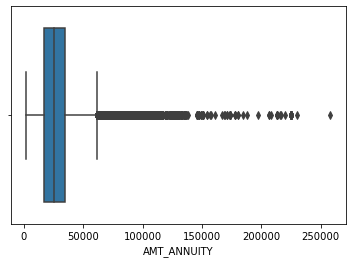

In [35]:
sns.boxplot(inp0['AMT_ANNUITY'])
plt.show()

- AMT_ANNUITY has outliers, the column can be imputed with median

In [36]:
inp0.AMT_ANNUITY.median()

24903.0

### 'NAME_TYPE_SUITE'

In [37]:
inp0.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

- NAME_TYPE_SUITE is a categorical column, It can imputing by mode()

In [38]:
inp0.NAME_TYPE_SUITE.mode()

0    Unaccompanied
dtype: object

### 'CNT_FAM_MEMBERS'

In [39]:
inp0.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

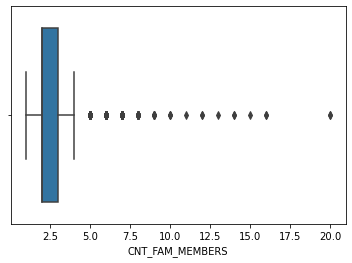

In [40]:
sns.boxplot(inp0['CNT_FAM_MEMBERS'])
plt.show()

- IT also has outliers, the column can be imputed using the median

In [41]:
inp0.CNT_FAM_MEMBERS.median()

2.0

### AMT_GOODS_PRICE 

In [42]:
inp0.AMT_GOODS_PRICE .value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

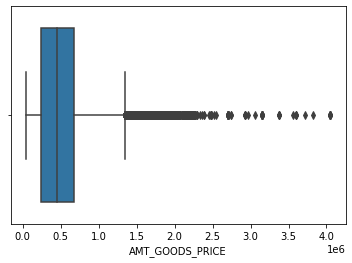

In [43]:
sns.boxplot(inp0['AMT_GOODS_PRICE'])
plt.show()

- Also having outliers , imputing columns using median()

In [44]:
inp0.AMT_GOODS_PRICE.median()

450000.0

### DAYS_LAST_PHONE_CHANGE

In [45]:
inp0.DAYS_LAST_PHONE_CHANGE.value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-4051.0        1
-3593.0        1
-3622.0        1
-3570.0        1
-3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

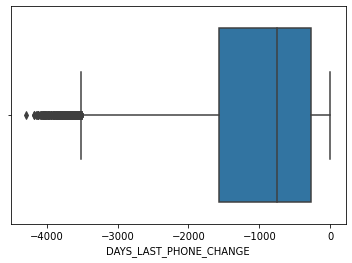

In [46]:
sns.boxplot(inp0['DAYS_LAST_PHONE_CHANGE'])
plt.show()

- No outliers imputing with mode

In [47]:
inp0.DAYS_LAST_PHONE_CHANGE.mode()

0    0.0
dtype: float64

### 'AMT_REQ_CREDIT_BUREAU_YEAR'

In [48]:
inp0.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [49]:
inp0.AMT_REQ_CREDIT_BUREAU_YEAR.mode() ## impute the missing values for the column 'AMT_REQ_CREDIT_BUREAU_YEAR' with mode

0    0.0
dtype: float64

- For all other columns of AMT_REQ also impute missing values with mode

In [50]:
inp0.AMT_REQ_CREDIT_BUREAU_MON.mode()

0    0.0
dtype: float64

In [51]:
inp0.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
dtype: float64

In [52]:
inp0.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
dtype: float64

In [53]:
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0    0.0
dtype: float64

In [54]:
inp0.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
dtype: float64

### Finding Errors in Data Type

In [55]:
inp0.select_dtypes('object').columns 

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [56]:
inp0.select_dtypes('float').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_M

In [57]:
#Converting these count columns to int64
Convert_Col = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                   'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_TOTAL']
inp0.loc[:,Convert_Col]=inp0.loc[:,Convert_Col].apply(lambda x: x.astype('int',errors='ignore'))

In [58]:
#Checking the object type columns
Convert_Col = list(inp0.select_dtypes(include='object').columns)
inp0.loc[:,Convert_Col]=inp0.loc[:,Convert_Col].apply(lambda x: x.astype('str',errors='ignore'))
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,nan,nan,0.0,0.0,0.0,

### Univariate Analysis - Categorical Variables

#### Check Imbalance

In [59]:
inp0.CODE_GENDER.value_counts()    # Column Gender Values

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [60]:
inp0 = inp0[inp0['CODE_GENDER']!='XNA']    ## Dropping 'XNA' Values from CODE GENDER Column
inp0['CODE_GENDER'].replace(['M','F'],['Male','Female'],inplace=True)

In [61]:
inp0['TARGET_CAT'] = inp0['TARGET'].apply(lambda x: 'default' if x == 1 else 'safe')
inp0.TARGET_CAT.value_counts(normalize=True)*100

safe       91.927013
default     8.072987
Name: TARGET_CAT, dtype: float64

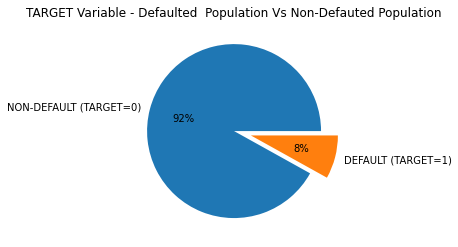

In [62]:
plt.pie(inp0.TARGET.value_counts(),labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.2),autopct='%1.f%%')
plt.title('TARGET Variable - Defaulted  Population Vs Non-Defauted Population')
plt.show()

In [63]:
inp0.CODE_GENDER.value_counts(normalize = True)*100   # Gender Distribution

Female    65.835249
Male      34.164751
Name: CODE_GENDER, dtype: float64

#### Occupation 

In [64]:
inp0.OCCUPATION_TYPE.value_counts(normalize=True)*100

nan                      31.345303
Laborers                 17.946258
Sales staff              10.439437
Core staff                8.965324
Managers                  6.949760
Drivers                   6.049618
High skill tech staff     3.700729
Accountants               3.191147
Medicine staff            2.776197
Security staff            2.185641
Cooking staff             1.933615
Cleaning staff            1.513136
Private service staff     0.862419
Low-skill Laborers        0.680310
Waiters/barmen staff      0.438364
Secretaries               0.424381
Realty agents             0.244222
HR staff                  0.183085
IT staff                  0.171053
Name: OCCUPATION_TYPE, dtype: float64

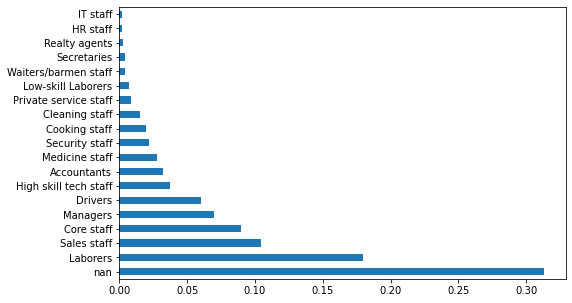

In [65]:
plt.figure(figsize=(8,5))
inp0[~(inp0.OCCUPATION_TYPE == 'Others')].OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

#### NAME_INCOME_TYPE

In [66]:
#Now we give different variable names for the two quantities

t0=inp0.loc[inp0.TARGET == 0]
t1=inp0.loc[inp0.TARGET == 1]

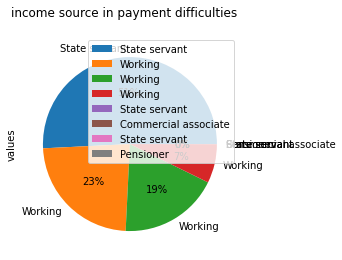

In [67]:
a1 = t0["NAME_INCOME_TYPE"].value_counts()
df1 = pd.DataFrame({'values': a1.values})
df1.plot.pie(labels=t0.NAME_INCOME_TYPE,title='income source in payment difficulties', subplots=True, autopct='%1.0f%%')
plt.show()


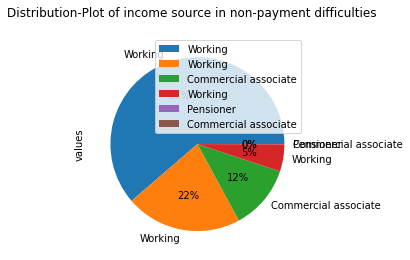

In [68]:
a2 = t1["NAME_INCOME_TYPE"].value_counts()
df2 = pd.DataFrame({'values': a2.values})
df2.plot.pie(labels=t1.NAME_INCOME_TYPE,title='Distribution-Plot of income source in non-payment difficulties', subplots=True, autopct='%1.0f%%')
plt.show()

In [69]:
# function approach to plot for categorical variables with these functions


def Plotdis(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=t0)
    plt.title('Distribution-Plot of '+ '%s' %var +' for non-payment difficulties', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for non-difficulties')
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=t1)
    plt.title('Distribution-Plot of '+ '%s' %var +' for difficulties', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for difficulties')
    plt.show()

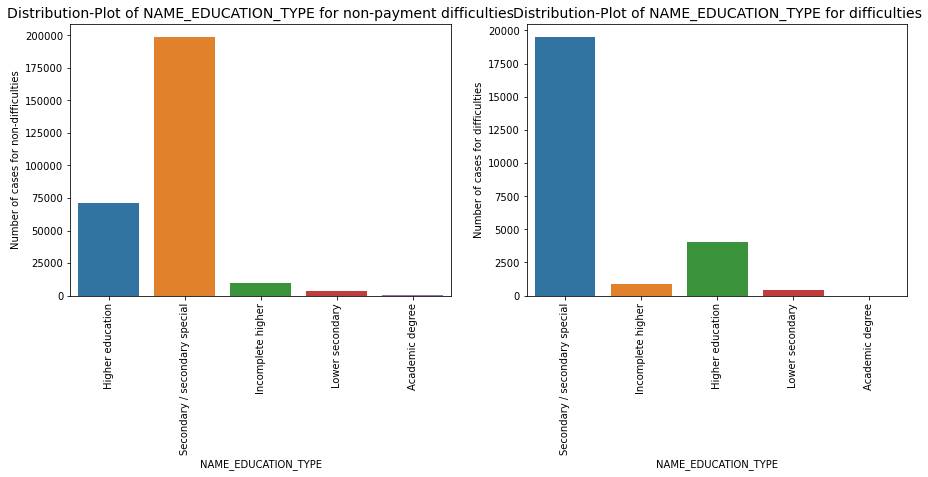

In [70]:
Plotdis("NAME_EDUCATION_TYPE")

- For Higher education is lesser than secondary/ secondary special for non payment difficulties
- For secondary/secondary special is high target1 plot as compare to higher educaton shown very less 
- other are similar in both Target0 & Target1

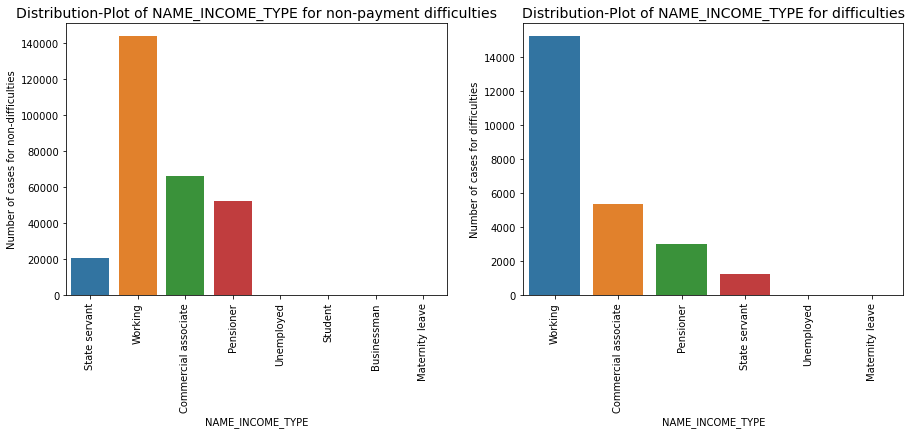

In [71]:
Plotdis('NAME_INCOME_TYPE')

- Among all most of the diffculties are of working population

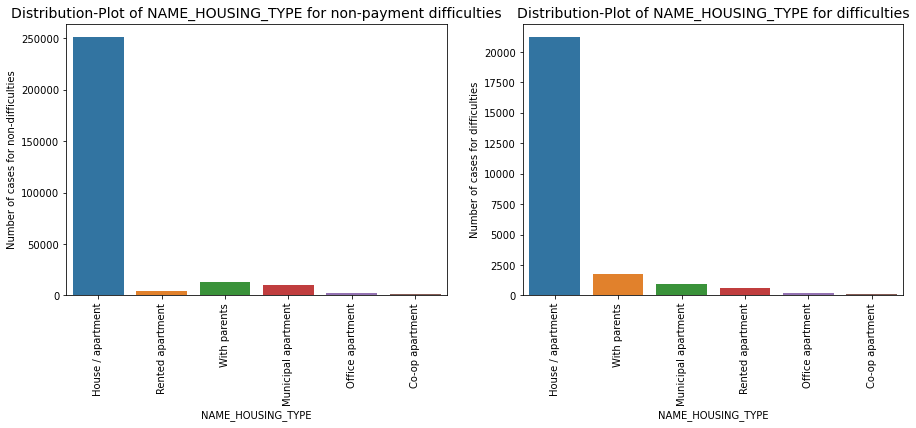

In [72]:
Plotdis('NAME_HOUSING_TYPE')

- from the above plot observe most of the population have their own house/ apartment  
- Hence, this is not the parameter that wil affect the payment Defaulters

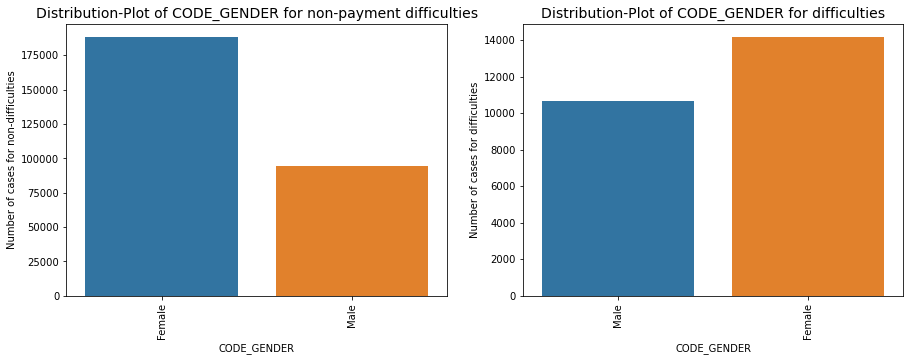

In [73]:
Plotdis('CODE_GENDER')

- As plot show females have high rate in both non-payment and payment difficulties

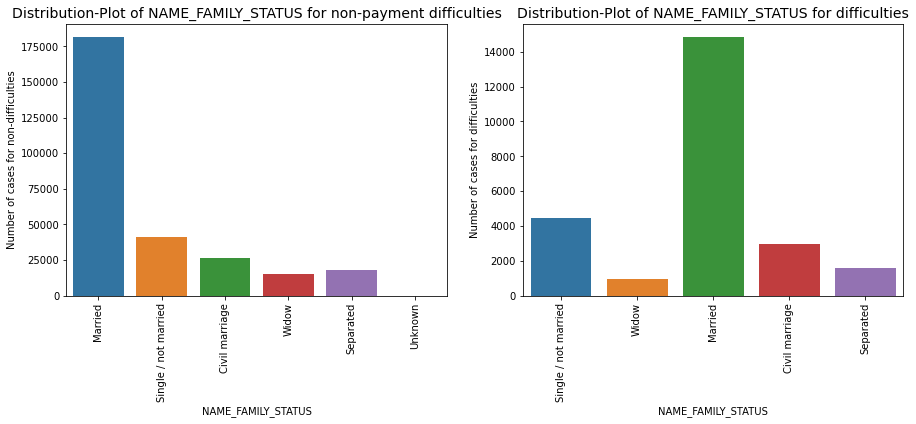

In [74]:
Plotdis('NAME_FAMILY_STATUS')

- Married applicants - almost 60% have difficulties on payments

## Univariate analysis -Variables

#### Binning the DAYS_BIRTH - Variable 

In [75]:
inp0.DAYS_BIRTH=inp0.DAYS_BIRTH.apply(lambda x: abs(x//365.25))
inp0.rename({'DAYS_BIRTH':'AGE_IN_YEARS'}, axis=1, inplace=True)
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Columns: 121 entries, SK_ID_CURR to TARGET_CAT
dtypes: float64(63), int32(1), int64(40), object(17)
memory usage: 285.1+ MB


In [76]:
inp0['AGE_GROUP']= pd.cut(inp0.AGE_IN_YEARS,bins=[15,25,35,45,55,65,75])
inp0['AGE_GROUP'].value_counts(normalize=True)

(35, 45]    0.274010
(25, 35]    0.235530
(45, 55]    0.228255
(55, 65]    0.196812
(15, 25]    0.039781
(65, 75]    0.025612
Name: AGE_GROUP, dtype: float64

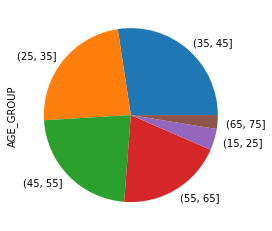

In [77]:
inp0['AGE_GROUP'].value_counts(normalize=True).plot.pie()
plt.show()

-  35-45 Age group is the largest Group of Age applying for loans. This may be attributed to consumerism aspect at that age.

In [78]:
def plot_dist(var):

    plt.style.use('ggplot')
    sns.despine
    sns.set_style('whitegrid')
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    
    # For Target 0
    
    sns.distplot(a=t0[var],ax=ax1, hist=True,)
    sns.color_palette("crest", as_cmap=True)    
    ax1.set_title(f'Distribution of {var} for Non-difficulties',fontsize=10)
    
    # For Target 1
    
    sns.distplot(a=t1[var],ax=ax2, hist=True,)
    ax2.set_title(f'Distribution of {var} for difficulties',fontsize=10)    
    sns.color_palette("crest", as_cmap=True)
   
    plt.show()

In [79]:
inp0['INCOME_GROUP']= pd.qcut(inp0['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])
inp0['INCOME_GROUP'].value_counts(normalize=True)

Medium      0.274140
High        0.245562
Low         0.218489
VeryHigh    0.153223
VeryLow     0.108586
Name: INCOME_GROUP, dtype: float64

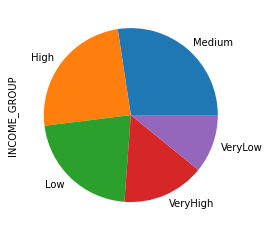

In [80]:
inp0['INCOME_GROUP'].value_counts(normalize=True).plot.pie()   ## INCOME_GROUP pie-plot 
plt.show()

- Medium Income group is the largest Group applying for loans.

### AMT_INCOME_TOTAL

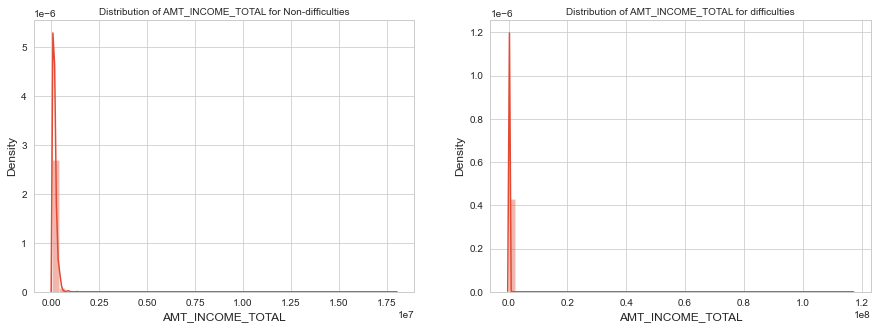

In [81]:
plot_dist('AMT_INCOME_TOTAL')

- above plot shows that for both target0 amd target1 plot is increase to the peak for non and diffuculties and after that a       gradual drop in the total income 

### AMT_CREDIT

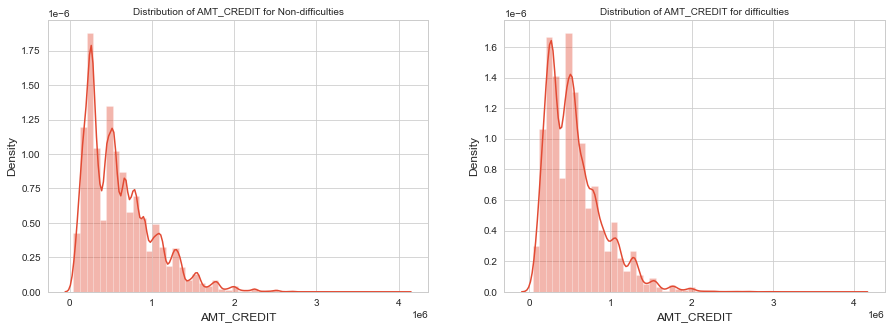

In [82]:
plot_dist('AMT_CREDIT')

- For AMT_CREDIT graph shown tends to high at the begining and then decreasing with increasng the value but not rapidly in spikes
- however for target1 the flow of spike tend to decreasing with increasing in values.

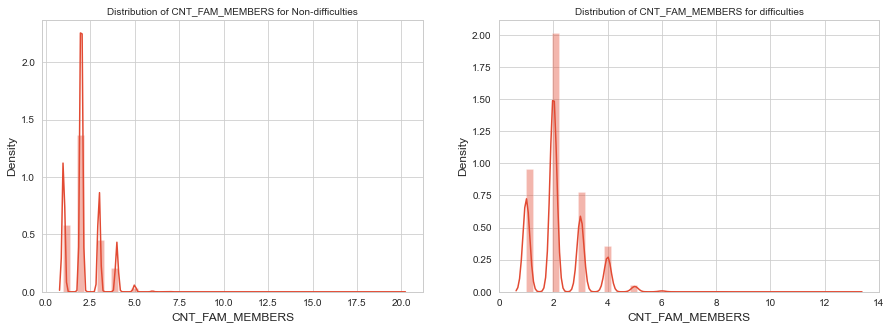

In [83]:
plot_dist('CNT_FAM_MEMBERS')

- Distribution shown above for 'CNT_FAM_MEMBERS' for target 0 and 1 
- plot shows the values at peak at certain values the starting decreasing 

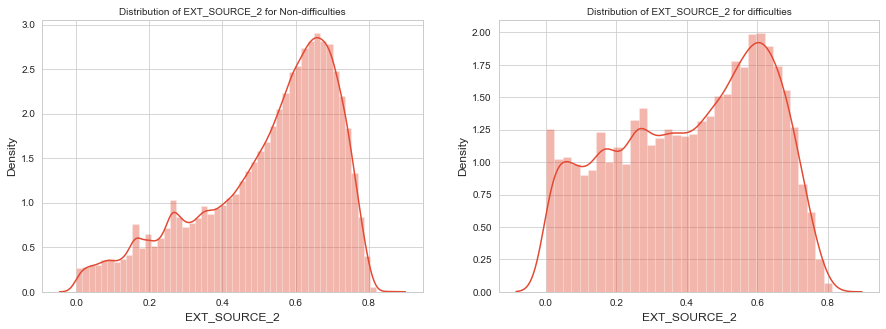

In [84]:
plot_dist('EXT_SOURCE_2')

- Distribution shown above for 'EXT_SOURCE_2' for target 0 and 1
- For non-difficulties or target0 has higher density than target 1

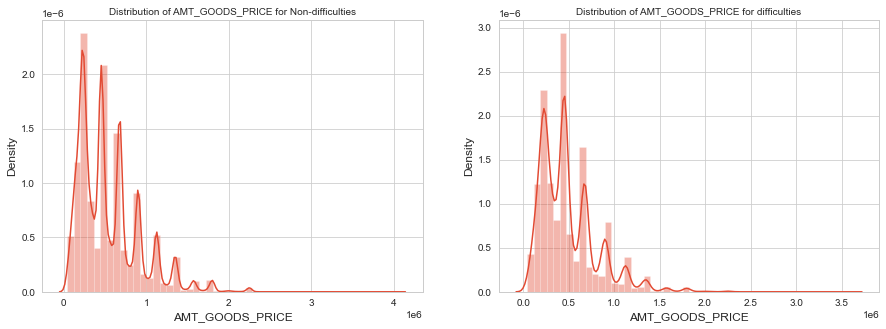

In [85]:
plot_dist('AMT_GOODS_PRICE')

- Target 0 has higher denisty than target1 for 'AMT_GOODS_PRICE'

### Numerical-Categorical Analysis

##### Occupation Type Vs Total Income

In [86]:
inp0.groupby('OCCUPATION_TYPE').AMT_INCOME_TOTAL.aggregate(['mean', 'median']) 

,mean,median
OCCUPATION_TYPE,,
Accountants,194578.356670,178650.0
Cleaning staff,130790.895121,112500.0
Cooking staff,138396.507400,126000.0
Core staff,172658.058363,157500.0
Drivers,187011.605763,180000.0
HR staff,188916.277087,158400.0
High skill tech staff,182842.044288,157500.0
IT staff,213465.600760,180000.0
Laborers,166357.481626,157500.0


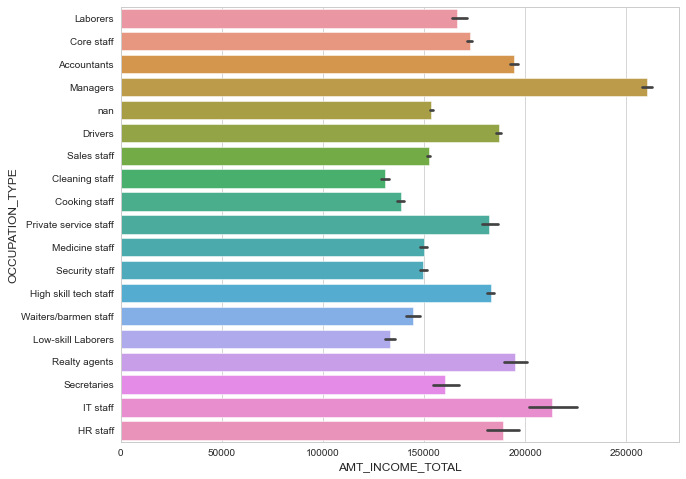

In [87]:
plt.figure(figsize=(10,8))                                   # bar plot analysis of OCCUPATION_TYPE vs AMT_INCOME_TOTAL
sns.barplot(inp0.AMT_INCOME_TOTAL, inp0.OCCUPATION_TYPE)
plt.show()

- As the above plot shows most higher value of 'AMT_INCOME_TOTAL'  are for 'OCCUPATION_TYPE' Called Manager

#### Marital status vs Amount requested for loan

In [88]:
inp0.groupby('NAME_FAMILY_STATUS').AMT_CREDIT.aggregate(['mean', 'median'])# mean and median for 'NAME_FAMILY_STATUS' vs 'AMT_CREDIT'

,mean,median
NAME_FAMILY_STATUS,,
Civil marriage,541573.512494,457834.50
Married,643004.227484,545040.00
Separated,552113.820410,477000.00
Single / not married,505350.178835,431741.25
Unknown,630000.000000,630000.00
Widow,490695.908596,414229.50


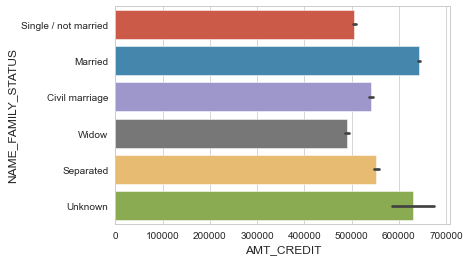

In [89]:
sns.barplot(inp0.AMT_CREDIT, inp0.NAME_FAMILY_STATUS) # bar plot analysis of NAME_FAMILY_STATUS vs AMT_CREDIT
plt.show()

- AMT_CREDIT is mostly higher for married defaulters

#### AMT_GOODS_PRICE VS AMT_CREDIT

In [90]:
inp0.groupby('AMT_GOODS_PRICE').AMT_CREDIT.aggregate(['mean', 'median'])# mean and median for 'AMT_GOODS_PRICE' vs 'AMT_CREDIT'

,mean,median
AMT_GOODS_PRICE,,
40500.0,4.851900e+04,48519.0
45000.0,5.046223e+04,50940.0
49500.0,5.572396e+04,56034.0
50751.0,6.147000e+04,61470.0
54000.0,6.071026e+04,61128.0
...,...,...
3555000.0,3.860019e+06,3860019.0
3600000.0,3.742560e+06,3600000.0
3712500.0,4.031032e+06,4031032.5


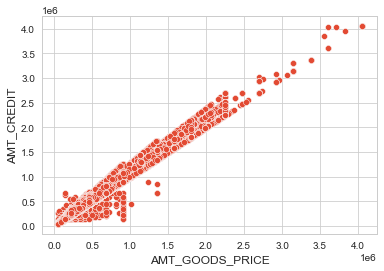

In [91]:
sns.scatterplot(x= 'AMT_GOODS_PRICE', y='AMT_CREDIT',data=inp0,ax=None)  # Scatter-plot analysis of AMT_GOODS_PRICE vs AMT_CREDIT
plt.show()

- Some outliers shown in AMT_CREDIT as AMT_GOODS_PRICE increases

#### Loan Amount VS Target

In [92]:
inp0.groupby('TARGET_CAT').AMT_CREDIT.aggregate(['mean', 'median'])

,mean,median
TARGET_CAT,,
default,557778.527674,497520.0
safe,602651.158355,517788.0


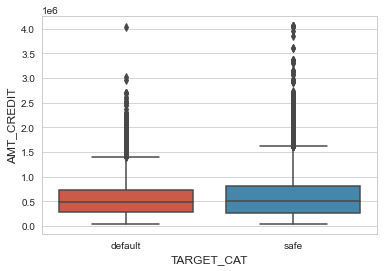

In [93]:
sns.boxplot(x=inp0.TARGET_CAT, y=inp0.AMT_CREDIT)
plt.show()

- Default shown few  outliers and the safe has number of outliers
- Safe is higher than the default 

#### Ext_Source  vs target

In [94]:
inp0.groupby('TARGET_CAT').AMT_INCOME_TOTAL.aggregate(['mean', 'median'])

,mean,median
TARGET_CAT,,
default,165611.760081,135000.0
safe,169077.470794,148500.0


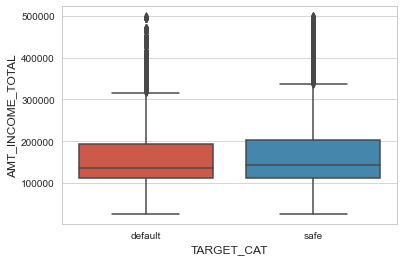

In [95]:
sns.boxplot(x=inp0.TARGET_CAT, y=inp0[inp0.AMT_INCOME_TOTAL < 0.5*10**6].AMT_INCOME_TOTAL)
plt.show()

- default has outlier 
- values are slightly high in safe in distribution of 'AMT_INCOME_TOTAL' vs 'TARGET_CAT'

#### NAME_EDUCATION_TYPE VS NAME_EDUCATION_TYPE

In [96]:
inp0.groupby('NAME_EDUCATION_TYPE').AMT_CREDIT.aggregate(['mean', 'median'])

,mean,median
NAME_EDUCATION_TYPE,,
Academic degree,723515.625000,610056.0
Higher education,689954.262443,572076.0
Incomplete higher,566733.160422,468490.5
Lower secondary,489748.561321,432949.5
Secondary / secondary special,571195.635639,497520.0


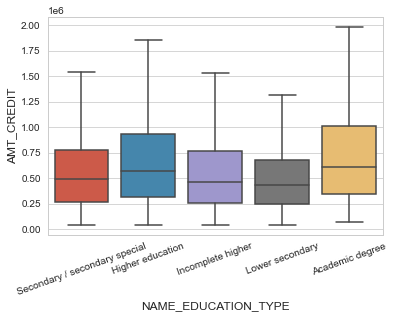

In [97]:
sns.boxplot(x=inp0.NAME_EDUCATION_TYPE, y=inp0.AMT_CREDIT , showfliers=False)
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.show()

- academic degree has the most high value for AMT_CREDIT vs NAME_EDUCATION_TYPE

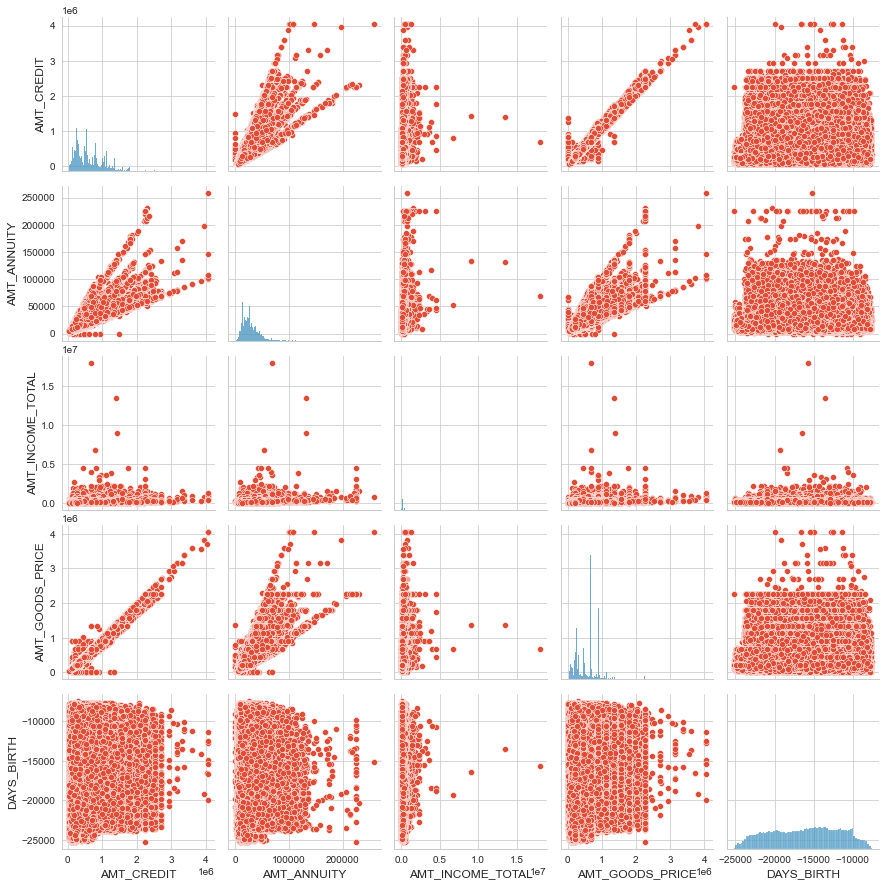

In [98]:
# Pair Plot for Target0 vs 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH'
Dis_pair = t0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)  
sns.pairplot(Dis_pair)
plt.show()

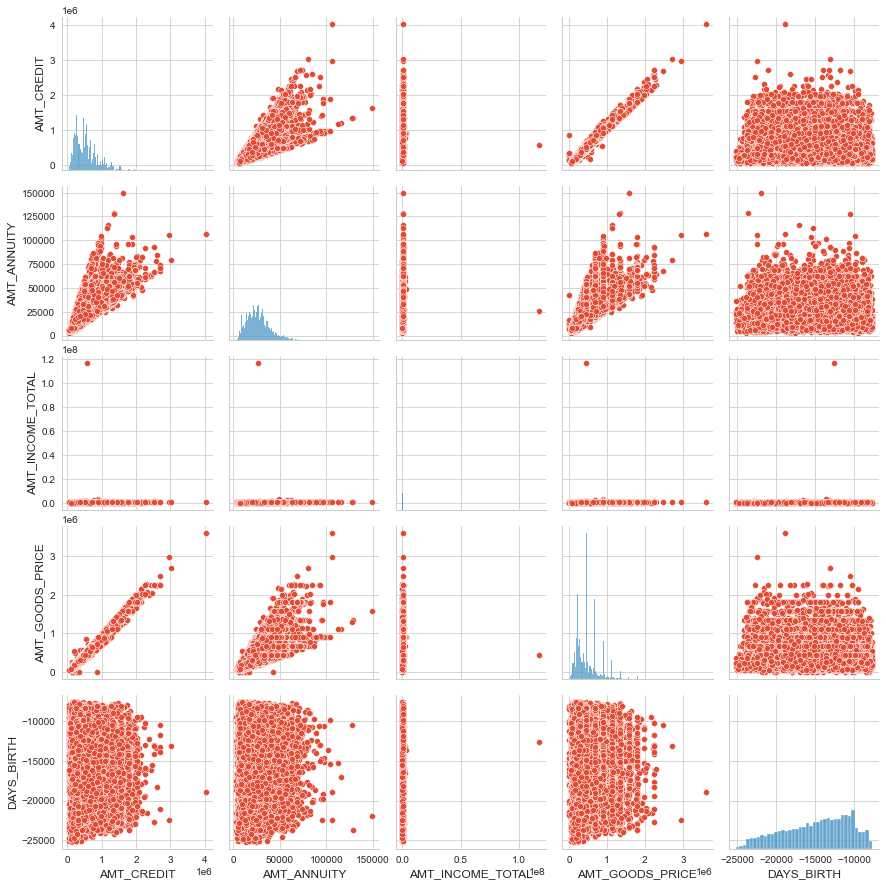

In [99]:
# Pair Plot for Target1 vs 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH'
Dis_pair = t1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(Dis_pair)
plt.show()

## Correlation

In [100]:
t0.corr().unstack().reset_index().sort_values(by=0,ascending=False)

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,1.0
4200,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_AVG,1.0
3150,APARTMENTS_AVG,APARTMENTS_AVG,1.0
3255,BASEMENTAREA_AVG,BASEMENTAREA_AVG,1.0
3360,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_AVG,1.0
...,...,...,...
10621,AMT_REQ_CREDIT_BUREAU_QRT,FLAG_MOBIL,NaN
10686,AMT_REQ_CREDIT_BUREAU_QRT,FLAG_DOCUMENT_2,NaN
10713,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,NaN
10725,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_MOBIL,NaN


###  Top 10 Correlation 

In [101]:
# Correlation in target 0 Dataframe
corr=t0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_ID_PUBLISH','AMT_CREDIT']].corr(method = 'pearson')
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr1=corr.unstack().reset_index()

In [102]:
# Correlation in target 1 dataframe
corr=t1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH','OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','AMT_CREDIT']].corr(method = 'pearson')
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr1=corr.unstack().reset_index()

In [103]:
corr1.columns = ['VAR1','VAR2','CORRELATION']
corr1.dropna(subset=['CORRELATION'],inplace=True)
corr1['CORR_ABS']=corr1['CORRELATION'].abs()

In [104]:
corr1.sort_values('CORR_ABS', ascending=False).head(10)

,VAR1,VAR2,CORRELATION,CORR_ABS
53,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998269,0.998269
56,AMT_CREDIT,AMT_GOODS_PRICE,0.983103,0.983103
16,AMT_ANNUITY,AMT_GOODS_PRICE,0.752699,0.752699
58,AMT_CREDIT,AMT_ANNUITY,0.752195,0.752195
35,DAYS_BIRTH,DAYS_EMPLOYED,-0.575097,0.575097
32,DAYS_BIRTH,AMT_GOODS_PRICE,-0.135810,0.135810
60,AMT_CREDIT,DAYS_BIRTH,-0.135316,0.135316
26,DAYS_EMPLOYED,AMT_ANNUITY,-0.082552,0.082552
17,AMT_ANNUITY,AMT_INCOME_TOTAL,0.046421,0.046421
57,AMT_CREDIT,AMT_INCOME_TOTAL,0.038131,0.038131


-  top 10 correlation for clients with payment difficulties shown in above dataframe

- As assumption is made from the previous application for top 10 correlation values for the currect application as shown in above 

###  Data Analysis on Previous Application data

In [105]:
inp1 = pd.read_csv("previous_application.csv")  # Read CSV file of previous application
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
inp1.info()                      # information of previous application

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [107]:
inp1=inp1.replace('XNA', np.NaN)  # replace XNA and XAP values to NaN
inp1=inp1.replace('XAP', np.NaN)

In [108]:
inp1.NAME_CONTRACT_STATUS.value_counts()  # Values Count in NAME_CONTRACT_STATUS

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

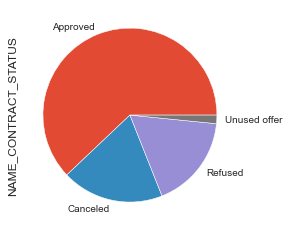

In [109]:
inp1['NAME_CONTRACT_STATUS'].value_counts(normalize=True).plot.pie()  # Pie plot analysis for NAME_CONTRACT_STATUS
plt.show()

- Shows 'NAME_CONTRACT_STATUS' is approved mostly and unused very less
- Also Cancelled and Refused mostly similar

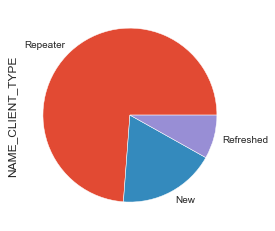

In [110]:
inp1['NAME_CLIENT_TYPE'].value_counts(normalize=True).plot.pie()  # pie Plot analysis NAME_CLIENT_TYPE
plt.show()

- 'Repeater' is to high & 'Refreshed' is low however 'New' valuse are medium 

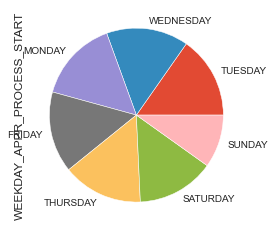

In [111]:
inp1['WEEKDAY_APPR_PROCESS_START'].value_counts(normalize=True).plot.pie() # pie Plot analysis WEEKDAY_APPR_PROCESS_START
plt.show()

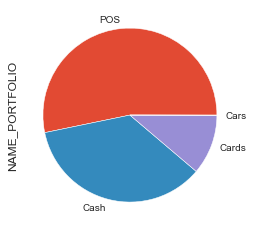

In [112]:
inp1['NAME_PORTFOLIO'].value_counts(normalize=True).plot.pie() # pie Plot analysis NAME_PORTFOLIO
plt.show()

- For NAME_PORTFOLIO the 'POS' values are mostly high and  'cash 'values are medium and 'Card' is the least

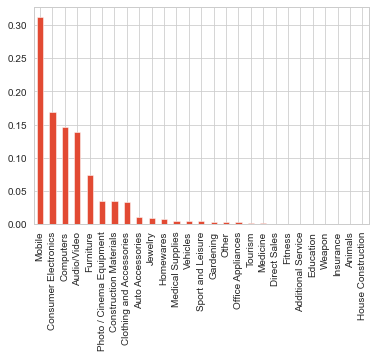

In [113]:
inp1['NAME_GOODS_CATEGORY'].value_counts(normalize=True).plot.bar()  # bar-plot analysis of NAME_GOODS_CATEGORY
plt.show()

- mobile has most high values among all and the least values or none are (jewelry, homewave,medical supplies,vehicles.. etc)

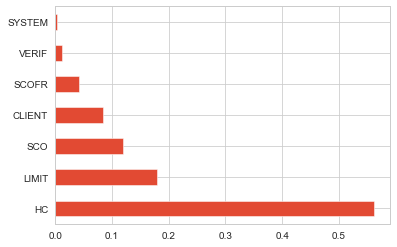

In [114]:
inp1['CODE_REJECT_REASON'].value_counts(normalize=True).plot.barh()   # bar-plot analysis of CODE_REJECT_REASON
plt.show()

- HC has most high values and least values are of system

## Correlation analysis of Previous Application

In [115]:
## Top 10 correlation of previous application .

corr=inp1.corr()
Corr2 = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
Corr2.columns=['Column1','Column2','Correlation']
Corr2.dropna(subset=['Correlation'],inplace=True)
Corr2['Abs_Correlation']=Corr2['Correlation'].abs()
Corr2 = Corr2.sort_values(by=['Abs_Correlation'], ascending=False)
Corr2.head(10)

,Column1,Column2,Correlation,Abs_Correlation
129,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884,0.999884
130,AMT_GOODS_PRICE,AMT_CREDIT,0.993087,0.993087
87,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
417,DAYS_TERMINATION,DAYS_LAST_DUE,0.927990,0.927990
128,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895,0.820895
86,AMT_CREDIT,AMT_ANNUITY,0.816429,0.816429
65,AMT_APPLICATION,AMT_ANNUITY,0.808872,0.808872
372,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,-0.803494,0.803494
297,CNT_PAYMENT,AMT_APPLICATION,0.680630,0.680630
298,CNT_PAYMENT,AMT_CREDIT,0.674278,0.674278


### bivariate analysis on numerical columns

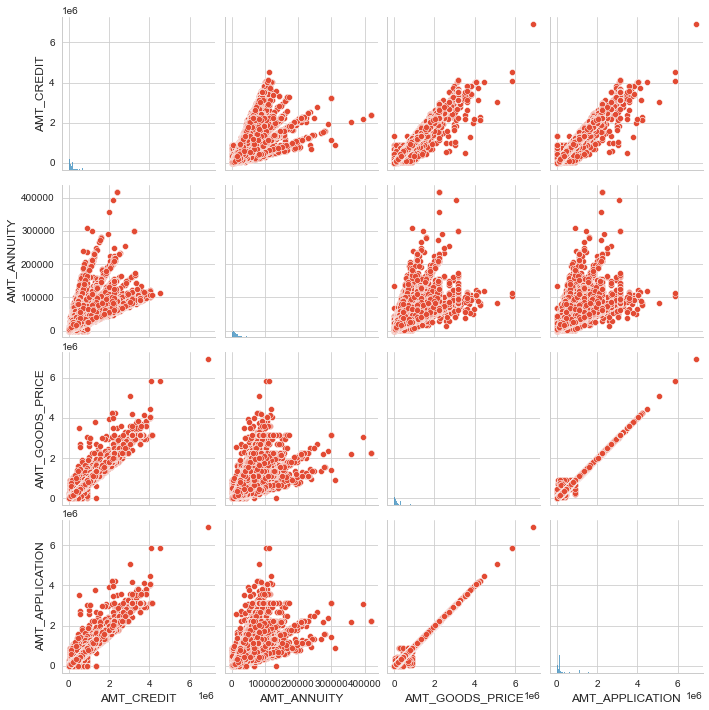

In [116]:
# Pair Plot analysis b/w 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE', 'AMT_APPLICATION', 'NAME_CONTRACT_STATUS'

sns.pairplot(inp1[['AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE', 'AMT_APPLICATION', 'NAME_CONTRACT_STATUS']])
plt.show()

- High Annuity shown in Previous application & increases with credit amount & good Price
- previous application is highly influenced by the Goods price

### bivariate analysis on categorical vs numeric columns


#### NAME_CONTRACT_STATUS  vs AMT_CREDIT

In [117]:
inp1.groupby('NAME_CONTRACT_STATUS').AMT_CREDIT.aggregate(['mean', 'median'])

,mean,median
NAME_CONTRACT_STATUS,,
Approved,202564.182131,102208.5
Canceled,24187.057127,0.0
Refused,371689.841222,182956.5
Unused offer,69783.990800,57960.0


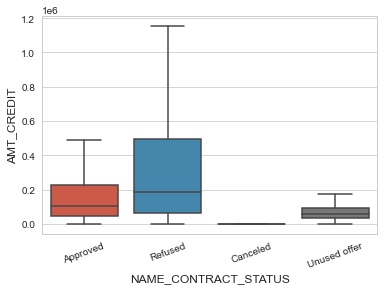

In [118]:
sns.boxplot(x=inp1.NAME_CONTRACT_STATUS, y=inp1.AMT_CREDIT , showfliers=False)
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.show()

-  AMT_CREDIT is too low, it gets cancelled/unused most of the time.

#### NAME_CONTRACT_STATUS VS  AMT_ANNUITY

In [119]:
inp1.groupby('NAME_CONTRACT_STATUS').AMT_ANNUITY.aggregate(['mean', 'median'])

,mean,median
NAME_CONTRACT_STATUS,,
Approved,14720.350105,10380.240
Canceled,30289.763892,26474.625
Refused,20498.160274,15653.880
Unused offer,10145.798635,9980.640


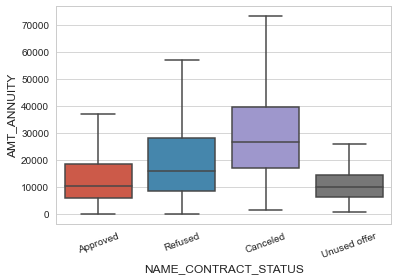

In [120]:
sns.boxplot(x=inp1.NAME_CONTRACT_STATUS, y=inp1.AMT_ANNUITY , showfliers=False)
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.show()

- AMT_ANNUITY gets canceled or Unused most of the time.
- AMT ANNUITY is too high & also refused more oftenly

#### NAME_CONTRACT_STATUS VS AMT_CREDIT

In [121]:
inp1.groupby('NAME_CONTRACT_STATUS').AMT_GOODS_PRICE.aggregate(['mean', 'median'])

,mean,median
NAME_CONTRACT_STATUS,,
Approved,188348.698834,96709.5
Canceled,668893.339078,454500.0
Refused,380452.993018,225000.0
Unused offer,69773.929734,57960.0


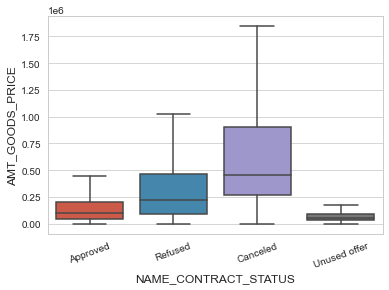

In [122]:
sns.boxplot(x=inp1.NAME_CONTRACT_STATUS, y=inp1.AMT_GOODS_PRICE , showfliers=False)
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.show()

- AMT_GOODS_PRICE is high, it get's cancelled/Refused most of the time

# Conclusion

- Probability of successful payments to be high, banks should focus on Businessmen and Students and should avoid the Working people 
- Major variables to consider for loan
a) AMT_ANNUITY
b) NAME_INCOME_TYPE
c) AMT_CREDIT
d) DAYS_BIRTH
e) NAME_HOUSING_TYPE
f) NAME_EDUCATION_TYPE
g) AMT_INCOME_TOTAL

